# Disease Prediction from Symptoms

This notebook trains a machine learning model to predict diseases based on symptom descriptions using the Symptom2Disease.csv dataset.

## 1. Import Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('Symptom2Disease.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("First few rows:")
print(df.head(10))
print("\n" + "="*50)
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Data Types:")
print(df.dtypes)

Dataset Shape: (1200, 3)

First few rows:
   Unnamed: 0      label                                               text
0           0  Psoriasis  I have been experiencing a skin rash on my arm...
1           1  Psoriasis  My skin has been peeling, especially on my kne...
2           2  Psoriasis  I have been experiencing joint pain in my fing...
3           3  Psoriasis  There is a silver like dusting on my skin, esp...
4           4  Psoriasis  My nails have small dents or pits in them, and...
5           5  Psoriasis  The skin on my palms and soles is thickened an...
6           6  Psoriasis  The skin around my mouth, nose, and eyes is re...
7           7  Psoriasis  My skin is very sensitive and reacts easily to...
8           8  Psoriasis  I have noticed a sudden peeling of skin at dif...
9           9  Psoriasis  The skin on my genitals is red and inflamed. I...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 

Disease Distribution:
label
Psoriasis                          50
Varicose Veins                     50
Typhoid                            50
Chicken pox                        50
Impetigo                           50
Dengue                             50
Fungal infection                   50
Common Cold                        50
Pneumonia                          50
Dimorphic Hemorrhoids              50
Arthritis                          50
Acne                               50
Bronchial Asthma                   50
Hypertension                       50
Migraine                           50
Cervical spondylosis               50
Jaundice                           50
Malaria                            50
urinary tract infection            50
allergy                            50
gastroesophageal reflux disease    50
drug reaction                      50
peptic ulcer disease               50
diabetes                           50
Name: count, dtype: int64

Number of unique diseases: 24


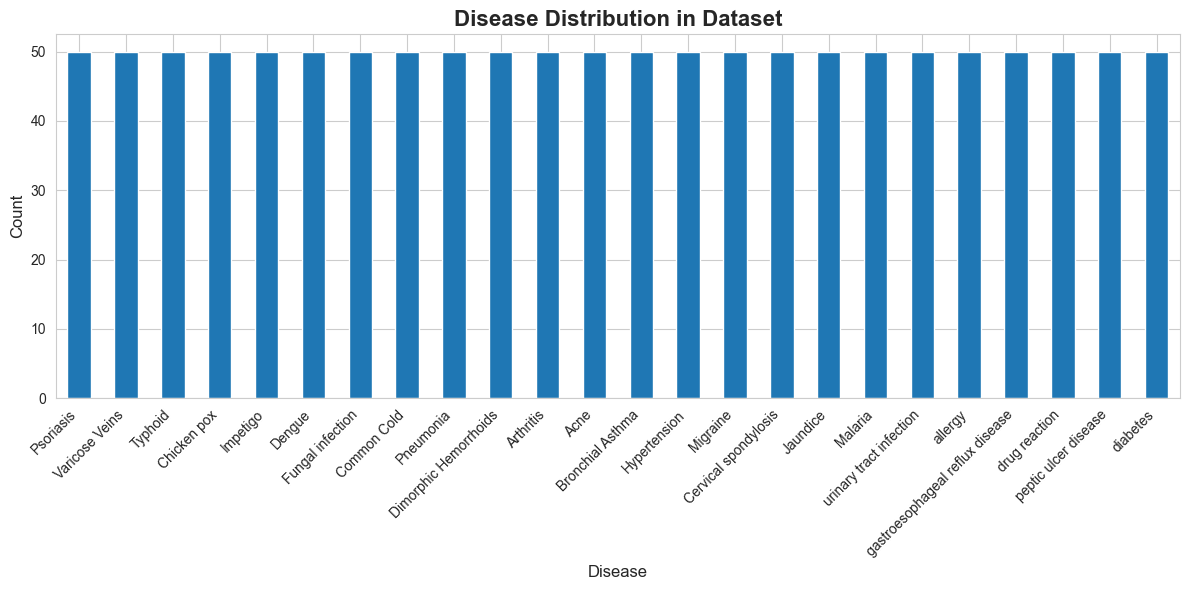

In [3]:
# Check the distribution of diseases
print("Disease Distribution:")
print(df['label'].value_counts())
print("\n" + "="*50)
print("Number of unique diseases:", df['label'].nunique())

# Visualize disease distribution
plt.figure(figsize=(12, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Disease Distribution in Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Verify Dataset Content - Check All Diseases

In [ ]:
# IMPORTANT: Check what diseases are actually in the dataset
print("=" * 70)
print("DATASET VERIFICATION")
print("=" * 70)

print("\n1. Unique diseases in the dataset:")
unique_diseases = df['label'].unique()
print(f"   Number of unique diseases: {len(unique_diseases)}")
print(f"   Diseases: {list(unique_diseases)}")

print("\n2. Full disease distribution:")
disease_counts = df['label'].value_counts()
print(disease_counts)

print("\n3. Percentage distribution:")
disease_percentages = df['label'].value_counts(normalize=True) * 100
for disease, pct in disease_percentages.items():
    print(f"   {disease}: {pct:.2f}%")

print("\n" + "=" * 70)
if len(unique_diseases) == 1:
    print("⚠️ WARNING: Your dataset contains only ONE disease!")
    print(f"   All {len(df)} samples are labeled as '{unique_diseases[0]}'")
    print("   The model can only predict this disease.")
    print("   You need a dataset with multiple diseases for proper classification.")
else:
    print(f"✅ Dataset contains {len(unique_diseases)} different diseases")
print("=" * 70)

## 3. Data Preprocessing

In [4]:
# Check for missing values and duplicates
print("Missing values before cleaning:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Drop the unnamed index column if it exists
if 'Unnamed: 0' in df.columns or df.columns[0].startswith('Unnamed'):
    df = df.drop(df.columns[0], axis=1)

# Clean text data - convert to lowercase
df['text'] = df['text'].str.lower()

print("\nDataset shape after cleaning:", df.shape)
print("Cleaned data sample:")
print(df.head())

Missing values before cleaning:
Unnamed: 0    0
label         0
text          0
dtype: int64

Duplicate rows: 0

Dataset shape after cleaning: (1200, 2)
Cleaned data sample:
       label                                               text
0  Psoriasis  i have been experiencing a skin rash on my arm...
1  Psoriasis  my skin has been peeling, especially on my kne...
2  Psoriasis  i have been experiencing joint pain in my fing...
3  Psoriasis  there is a silver like dusting on my skin, esp...
4  Psoriasis  my nails have small dents or pits in them, and...


## 4. Feature Engineering (Text Vectorization)

In [5]:
# Extract features (symptoms) and labels (diseases)
X = df['text']  # Symptom descriptions
y = df['label']  # Disease labels

# Use TF-IDF Vectorizer to convert text to numerical features
# This captures the importance of words in the symptom descriptions
tfidf_vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Feature matrix shape:", X_tfidf.shape)
print("Number of features:", X_tfidf.shape[1])
print("Number of samples:", X_tfidf.shape[0])
print("\nSample feature names:")
print(tfidf_vectorizer.get_feature_names_out()[:20])

Feature matrix shape: (1200, 500)
Number of features: 500
Number of samples: 1200

Sample feature names:
['abdomen' 'abdominal' 'abdominal pain' 'accompanied' 'ache' 'aches'
 'acid' 'acid reflux' 'acidic' 'acidity' 'activities' 'addition'
 'addition ve' 'additionally' 'additionally skin' 'additionally ve'
 'aftertaste' 'anus' 'anus quite' 'anus really']


## 5. Split Data into Training and Testing Sets

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("\nTraining set label distribution:")
print(y_train.value_counts())
print("\nTesting set label distribution:")
print(y_test.value_counts())

Training set size: 960
Testing set size: 240

Training set label distribution:
label
Chicken pox                        40
Common Cold                        40
Dimorphic Hemorrhoids              40
drug reaction                      40
Dengue                             40
Pneumonia                          40
Arthritis                          40
Hypertension                       40
allergy                            40
Acne                               40
gastroesophageal reflux disease    40
urinary tract infection            40
Impetigo                           40
peptic ulcer disease               40
Cervical spondylosis               40
diabetes                           40
Bronchial Asthma                   40
Varicose Veins                     40
Fungal infection                   40
Jaundice                           40
Typhoid                            40
Psoriasis                          40
Migraine                           40
Malaria                            40
Nam

## 6. Train Multiple Models

In [7]:
# Train multiple classifiers and compare their performance
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Dictionary to store trained models and their scores
trained_models = {}
model_scores = {}

print("Training models...\n")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    trained_models[name] = model
    model_scores[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("-" * 50)

Training models...

Training Random Forest...
Random Forest Accuracy: 0.9167
--------------------------------------------------
Training Naive Bayes...
Naive Bayes Accuracy: 0.9125
--------------------------------------------------
Training Logistic Regression...
Logistic Regression Accuracy: 0.9250
--------------------------------------------------
Training SVM...
SVM Accuracy: 0.9500
--------------------------------------------------


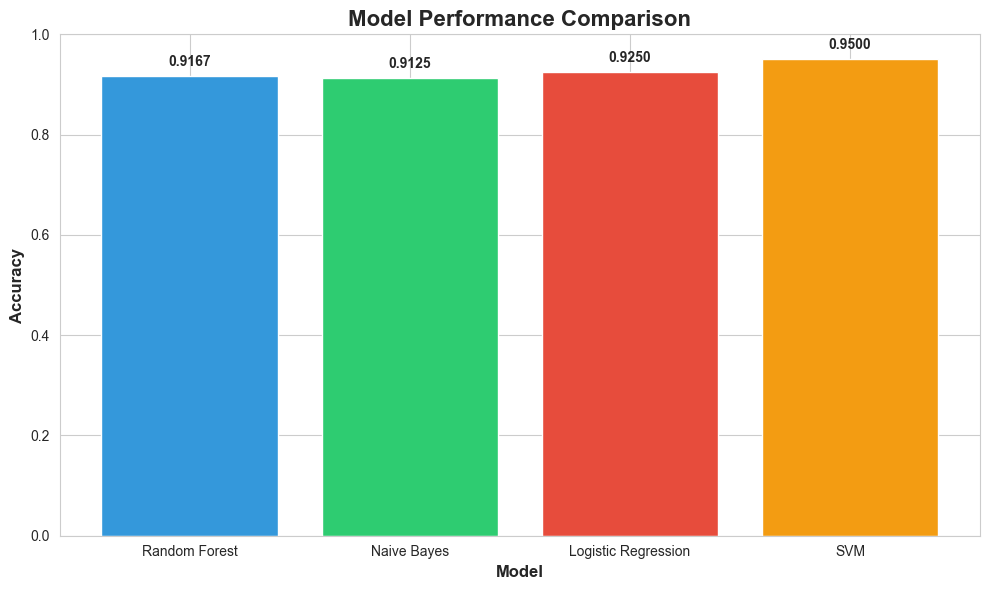


Best performing model: SVM with accuracy: 0.9500


In [8]:
# Visualize model comparison
plt.figure(figsize=(10, 6))
models_list = list(model_scores.keys())
scores_list = list(model_scores.values())

plt.bar(models_list, scores_list, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylim([0, 1])
for i, v in enumerate(scores_list):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Select the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model = trained_models[best_model_name]
print(f"\nBest performing model: {best_model_name} with accuracy: {model_scores[best_model_name]:.4f}")

## 7. Evaluate Model Performance

Detailed Evaluation for SVM

Classification Report:
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        10
                    Chicken pox       0.69      0.90      0.78        10
                    Common Cold       1.00      1.00      1.00        10
                         Dengue       0.89      0.80      0.84        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        10
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        10
                       Jaundice       1.00      1.00      1.00        1

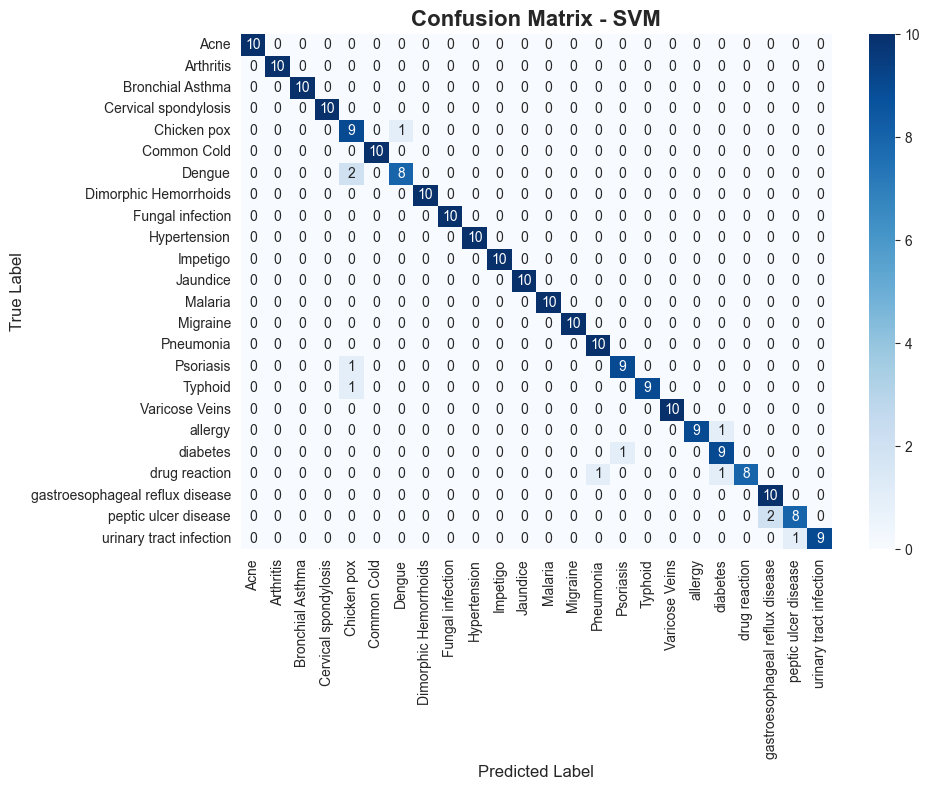

In [9]:
# Detailed evaluation of the best model
y_pred_best = best_model.predict(X_test)

print(f"Detailed Evaluation for {best_model_name}")
print("=" * 70)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

## 8. Make Predictions on New Symptoms

In [10]:
def predict_disease(symptom_text, model=best_model, vectorizer=tfidf_vectorizer):
    """
    Predict disease based on symptom description
    
    Parameters:
    - symptom_text: String describing the symptoms
    - model: Trained classifier model
    - vectorizer: Fitted TF-IDF vectorizer
    
    Returns:
    - Predicted disease name
    """
    # Convert text to lowercase
    symptom_text = symptom_text.lower()
    
    # Transform the input text using the fitted vectorizer
    symptom_vector = vectorizer.transform([symptom_text])
    
    # Make prediction
    prediction = model.predict(symptom_vector)
    
    # If the model supports probability predictions
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(symptom_vector)
        confidence = probabilities.max() * 100
        print(f"Prediction: {prediction[0]}")
        print(f"Confidence: {confidence:.2f}%")
    else:
        print(f"Prediction: {prediction[0]}")
    
    return prediction[0]

print("Disease Prediction Function Created Successfully!")
print("=" * 70)

Disease Prediction Function Created Successfully!


In [11]:
# Test the prediction function with example symptoms
test_symptoms = [
    "I have been experiencing skin rash on my arms and legs. It is red, itchy, and covered in dry, scaly patches.",
    "My skin has been peeling on my knees and elbows with a burning sensation. I also have joint pain.",
    "I have small dents in my nails and they feel inflammatory. There are rashes on my arms too."
]

print("Testing Disease Prediction with Sample Symptoms:\n")
print("=" * 70)

for i, symptom in enumerate(test_symptoms, 1):
    print(f"\nTest Case {i}:")
    print(f"Symptoms: {symptom}")
    print("-" * 70)
    predicted_disease = predict_disease(symptom)
    print("=" * 70)

Testing Disease Prediction with Sample Symptoms:


Test Case 1:
Symptoms: I have been experiencing skin rash on my arms and legs. It is red, itchy, and covered in dry, scaly patches.
----------------------------------------------------------------------
Prediction: Psoriasis

Test Case 2:
Symptoms: My skin has been peeling on my knees and elbows with a burning sensation. I also have joint pain.
----------------------------------------------------------------------
Prediction: Psoriasis

Test Case 3:
Symptoms: I have small dents in my nails and they feel inflammatory. There are rashes on my arms too.
----------------------------------------------------------------------
Prediction: Psoriasis


### Additional Testing with More Diverse Symptoms

In [12]:
# Extended test cases with varied symptom descriptions
extended_test_symptoms = [
    "I notice silvery scales on my back and elbows that flake off when I scratch them",
    "The skin on my palms and soles has become very thick with deep painful cracks that bleed",
    "I have red inflamed skin around my nose and eyes that is very itchy and uncomfortable",
    "My skin reacts badly to temperature changes and I have to be careful about products I use",
    "I have fatigue and lack of energy even after sleeping well, along with skin issues",
    "The rash spreads to my chest and gets worse at night making it hard to sleep",
    "My genitals have red irritated skin that burns and itches constantly",
    "I experience difficulty sleeping because of severe itching from the rash on my body",
    "There are infections developing on my dry flaky skin patches and my joints hurt",
    "My elbows and knees have thick cracked skin with a silver-like coating"
]

print("Extended Disease Prediction Testing:\n")
print("=" * 70)

for i, symptom in enumerate(extended_test_symptoms, 1):
    print(f"\nExtended Test Case {i}:")
    print(f"Symptoms: {symptom}")
    print("-" * 70)
    predicted_disease = predict_disease(symptom)
    print("=" * 70)

Extended Disease Prediction Testing:


Extended Test Case 1:
Symptoms: I notice silvery scales on my back and elbows that flake off when I scratch them
----------------------------------------------------------------------
Prediction: Psoriasis

Extended Test Case 2:
Symptoms: The skin on my palms and soles has become very thick with deep painful cracks that bleed
----------------------------------------------------------------------
Prediction: Psoriasis

Extended Test Case 3:
Symptoms: I have red inflamed skin around my nose and eyes that is very itchy and uncomfortable
----------------------------------------------------------------------
Prediction: Psoriasis

Extended Test Case 4:
Symptoms: My skin reacts badly to temperature changes and I have to be careful about products I use
----------------------------------------------------------------------
Prediction: Psoriasis

Extended Test Case 5:
Symptoms: I have fatigue and lack of energy even after sleeping well, along with skin iss

### Testing with Edge Cases and Combinations

In [13]:
# Edge cases: short descriptions, multiple symptoms, specific terms
edge_case_symptoms = [
    "skin rash and joint pain",
    "My nails have pits and dents",
    "peeling skin inflammation",
    "I have severe psoriasis symptoms with rashes, peeling, joint pain, and nail problems",
    "itchy scaly patches on arms",
    "burning sensation on skin with scales",
    "nail inflammation with skin issues",
    "rash",
    "My skin condition is getting worse with red patches and scales everywhere",
    "Joint pain in fingers and wrists with skin peeling on elbows"
]

print("Edge Case Testing:\n")
print("=" * 70)

for i, symptom in enumerate(edge_case_symptoms, 1):
    print(f"\nEdge Case {i}:")
    print(f"Symptoms: {symptom}")
    print("-" * 70)
    predicted_disease = predict_disease(symptom)
    print("=" * 70)

Edge Case Testing:


Edge Case 1:
Symptoms: skin rash and joint pain
----------------------------------------------------------------------
Prediction: Psoriasis

Edge Case 2:
Symptoms: My nails have pits and dents
----------------------------------------------------------------------
Prediction: Psoriasis

Edge Case 3:
Symptoms: peeling skin inflammation
----------------------------------------------------------------------
Prediction: Psoriasis

Edge Case 4:
Symptoms: I have severe psoriasis symptoms with rashes, peeling, joint pain, and nail problems
----------------------------------------------------------------------
Prediction: Psoriasis

Edge Case 5:
Symptoms: itchy scaly patches on arms
----------------------------------------------------------------------
Prediction: Psoriasis

Edge Case 6:
Symptoms: burning sensation on skin with scales
----------------------------------------------------------------------
Prediction: Psoriasis

Edge Case 7:
Symptoms: nail inflammation with 

### Testing Model Predictions Summary

In [14]:
# Summary statistics of all test predictions
all_test_cases = test_symptoms + extended_test_symptoms + edge_case_symptoms
all_predictions = []

print("Generating predictions for all test cases...")
print("=" * 70)

for symptom in all_test_cases:
    symptom_vector = tfidf_vectorizer.transform([symptom.lower()])
    prediction = best_model.predict(symptom_vector)[0]
    all_predictions.append(prediction)

# Create summary
prediction_summary = pd.DataFrame({
    'Symptom Description': all_test_cases,
    'Predicted Disease': all_predictions
})

print(f"\nTotal test cases: {len(all_test_cases)}")
print(f"\nPrediction Distribution:")
print(prediction_summary['Predicted Disease'].value_counts())
print("\n" + "=" * 70)
print("\nDetailed Predictions:")
print(prediction_summary.to_string(index=True))

Generating predictions for all test cases...

Total test cases: 23

Prediction Distribution:
Predicted Disease
Psoriasis           19
Chicken pox          1
drug reaction        1
Impetigo             1
Fungal infection     1
Name: count, dtype: int64


Detailed Predictions:
                                                                                             Symptom Description Predicted Disease
0   I have been experiencing skin rash on my arms and legs. It is red, itchy, and covered in dry, scaly patches.         Psoriasis
1              My skin has been peeling on my knees and elbows with a burning sensation. I also have joint pain.         Psoriasis
2                    I have small dents in my nails and they feel inflammatory. There are rashes on my arms too.         Psoriasis
3                               I notice silvery scales on my back and elbows that flake off when I scratch them         Psoriasis
4                       The skin on my palms and soles has become ver

### Testing with DIFFERENT Diseases

Now let's test with symptoms from OTHER diseases in the dataset to verify the model can distinguish between them:

In [15]:
# Test with symptoms from DIFFERENT diseases
diverse_disease_symptoms = [
    # Common Cold
    "I have a runny nose, sneezing, and a sore throat with mild fever",
    
    # Malaria  
    "I have high fever with chills and sweating, along with headache and body aches",
    
    # Hypertension
    "I experience frequent headaches, dizziness, and my blood pressure is very high",
    
    # Diabetes (if in dataset)
    "I feel extremely thirsty all the time, urinate frequently, and have unexplained weight loss",
    
    # Migraine
    "I have severe throbbing headache on one side with nausea and sensitivity to light",
    
    # Pneumonia
    "I have chest pain, difficulty breathing, high fever and coughing up phlegm",
    
    # Arthritis
    "My joints are swollen, stiff in the morning, and I have chronic joint pain",
    
    # Dengue
    "I have high fever, severe muscle pain, rash, and low platelet count",
    
    # Jaundice
    "My skin and eyes have turned yellow, I feel tired and have abdominal pain",
    
    # Acne
    "I have pimples and blackheads on my face, oily skin with inflammation",
    
    # Fungal infection
    "I have itchy circular rashes on my skin with red edges and clear center",
    
    # Chicken pox
    "I have fever and itchy blisters all over my body that form scabs",
    
    # Typhoid
    "I have prolonged high fever, weakness, stomach pain and loss of appetite",
    
    # Gastroesophageal reflux
    "I have burning sensation in chest, acid reflux, and heartburn after meals",
    
    # Urinary tract infection
    "I have burning sensation while urinating and frequent urge to urinate"
]

print("Testing with DIVERSE Disease Symptoms:")
print("=" * 70)

diverse_predictions = {}
for i, symptom in enumerate(diverse_disease_symptoms, 1):
    print(f"\nDiverse Test {i}:")
    print(f"Symptoms: {symptom}")
    print("-" * 70)
    predicted = predict_disease(symptom)
    diverse_predictions[symptom[:50] + "..."] = predicted
    print("=" * 70)

print("\n\n" + "=" * 70)
print("SUMMARY OF DIVERSE DISEASE PREDICTIONS:")
print("=" * 70)
prediction_counts = {}
for pred in diverse_predictions.values():
    prediction_counts[pred] = prediction_counts.get(pred, 0) + 1

for disease, count in sorted(prediction_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{disease}: {count} predictions")
    
if len(prediction_counts) == 1:
    print("\n⚠️ WARNING: Model is predicting ONLY ONE disease for all symptoms!")
    print("This suggests the model is not learning properly.")
else:
    print(f"\n✅ Model predicted {len(prediction_counts)} different diseases!")

Testing with DIVERSE Disease Symptoms:

Diverse Test 1:
Symptoms: I have a runny nose, sneezing, and a sore throat with mild fever
----------------------------------------------------------------------
Prediction: allergy

Diverse Test 2:
Symptoms: I have high fever with chills and sweating, along with headache and body aches
----------------------------------------------------------------------
Prediction: Malaria

Diverse Test 3:
Symptoms: I experience frequent headaches, dizziness, and my blood pressure is very high
----------------------------------------------------------------------
Prediction: drug reaction

Diverse Test 4:
Symptoms: I feel extremely thirsty all the time, urinate frequently, and have unexplained weight loss
----------------------------------------------------------------------
Prediction: diabetes

Diverse Test 5:
Symptoms: I have severe throbbing headache on one side with nausea and sensitivity to light
----------------------------------------------------------

## 10. Export Model for Web Application

In [17]:
import pickle
import os
# Save the best model and vectorizer
model_filename = 'disease_prediction_model.pkl'
vectorizer_filename = 'tfidf_vectorizer.pkl'

# Save model
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)
    
# Save vectorizer
with open(vectorizer_filename, 'wb') as vec_file:
    pickle.dump(tfidf_vectorizer, vec_file)

print("=" * 70)
print("MODEL EXPORT SUCCESSFUL!")
print("=" * 70)
print(f"✅ Model saved as: {model_filename}")
print(f"✅ Vectorizer saved as: {vectorizer_filename}")
print(f"✅ Best model: {best_model_name}")
print(f"✅ Model accuracy: {model_scores[best_model_name]:.4f}")
print("=" * 70)
print("\nThese files can be used in your web application!")
print("Files saved in:", os.getcwd())

MODEL EXPORT SUCCESSFUL!
✅ Model saved as: disease_prediction_model.pkl
✅ Vectorizer saved as: tfidf_vectorizer.pkl
✅ Best model: SVM
✅ Model accuracy: 0.9500

These files can be used in your web application!
Files saved in: c:\Users\yassi\Desktop\disease model


### Create Flask Web Application

Now let's create a simple web server and HTML interface:

In [18]:
# Create Flask app file
flask_app_code = """from flask import Flask, request, jsonify, render_template
import pickle
import os

app = Flask(__name__)

# Load the model and vectorizer
model_path = 'disease_prediction_model.pkl'
vectorizer_path = 'tfidf_vectorizer.pkl'

print("Loading model and vectorizer...")
with open(model_path, 'rb') as f:
    model = pickle.load(f)
    
with open(vectorizer_path, 'rb') as f:
    vectorizer = pickle.load(f)
print("Model loaded successfully!")

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        symptoms = data['symptoms']
        
        # Transform symptoms and make prediction
        symptoms_vector = vectorizer.transform([symptoms.lower()])
        prediction = model.predict(symptoms_vector)[0]
        
        # Get confidence if available
        confidence = None
        if hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(symptoms_vector)
            confidence = float(probabilities.max() * 100)
        
        return jsonify({
            'success': True,
            'disease': prediction,
            'confidence': confidence
        })
    except Exception as e:
        return jsonify({
            'success': False,
            'error': str(e)
        })

if __name__ == '__main__':
    app.run(debug=True, port=5000)
"""

# Save Flask app
with open('app.py', 'w') as f:
    f.write(flask_app_code)

print("✅ Flask app created: app.py")

✅ Flask app created: app.py


In [19]:
# Create HTML template
html_code = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Disease Prediction System</title>
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }
        
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
            display: flex;
            justify-content: center;
            align-items: center;
            padding: 20px;
        }
        
        .container {
            background: white;
            border-radius: 20px;
            box-shadow: 0 20px 60px rgba(0,0,0,0.3);
            max-width: 600px;
            width: 100%;
            padding: 40px;
        }
        
        h1 {
            color: #333;
            text-align: center;
            margin-bottom: 10px;
            font-size: 2em;
        }
        
        .subtitle {
            text-align: center;
            color: #666;
            margin-bottom: 30px;
            font-size: 0.9em;
        }
        
        label {
            display: block;
            color: #555;
            font-weight: 600;
            margin-bottom: 10px;
        }
        
        textarea {
            width: 100%;
            padding: 15px;
            border: 2px solid #e0e0e0;
            border-radius: 10px;
            font-size: 16px;
            font-family: inherit;
            resize: vertical;
            min-height: 120px;
            transition: border-color 0.3s;
        }
        
        textarea:focus {
            outline: none;
            border-color: #667eea;
        }
        
        button {
            width: 100%;
            padding: 15px;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            border: none;
            border-radius: 10px;
            font-size: 18px;
            font-weight: 600;
            cursor: pointer;
            margin-top: 20px;
            transition: transform 0.2s, box-shadow 0.2s;
        }
        
        button:hover {
            transform: translateY(-2px);
            box-shadow: 0 10px 20px rgba(102, 126, 234, 0.4);
        }
        
        button:active {
            transform: translateY(0);
        }
        
        .result {
            margin-top: 30px;
            padding: 20px;
            border-radius: 10px;
            display: none;
        }
        
        .result.success {
            background: #d4edda;
            border: 2px solid #28a745;
        }
        
        .result.error {
            background: #f8d7da;
            border: 2px solid #dc3545;
        }
        
        .result h2 {
            margin-bottom: 10px;
            color: #333;
        }
        
        .disease-name {
            font-size: 1.5em;
            color: #667eea;
            font-weight: bold;
            margin: 10px 0;
        }
        
        .confidence {
            color: #666;
            font-size: 0.9em;
        }
        
        .loading {
            text-align: center;
            color: #667eea;
            display: none;
            margin-top: 20px;
        }
        
        .example {
            background: #f8f9fa;
            padding: 15px;
            border-radius: 10px;
            margin-top: 20px;
            border-left: 4px solid #667eea;
        }
        
        .example h3 {
            color: #667eea;
            font-size: 0.9em;
            margin-bottom: 10px;
        }
        
        .example p {
            color: #666;
            font-size: 0.85em;
            line-height: 1.6;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>🏥 Disease Prediction System</h1>
        <p class="subtitle">Describe your symptoms and get an AI-powered diagnosis</p>
        
        <form id="predictionForm">
            <label for="symptoms">Enter Your Symptoms:</label>
            <textarea 
                id="symptoms" 
                name="symptoms" 
                placeholder="Example: I have fever, headache, and body aches..."
                required
            ></textarea>
            
            <button type="submit">Predict Disease</button>
        </form>
        
        <div class="loading" id="loading">
            <p>🔍 Analyzing symptoms...</p>
        </div>
        
        <div class="result" id="result">
            <h2>Prediction Result:</h2>
            <div class="disease-name" id="diseaseName"></div>
            <div class="confidence" id="confidence"></div>
        </div>
        
        <div class="example">
            <h3>💡 Example Symptoms:</h3>
            <p>• "I have skin rash on my arms and legs with itching"<br>
               • "I have high fever with chills and sweating"<br>
               • "I experience severe headache with nausea"</p>
        </div>
    </div>
    
    <script>
        document.getElementById('predictionForm').addEventListener('submit', async (e) => {
            e.preventDefault();
            
            const symptoms = document.getElementById('symptoms').value;
            const resultDiv = document.getElementById('result');
            const loading = document.getElementById('loading');
            
            // Show loading
            loading.style.display = 'block';
            resultDiv.style.display = 'none';
            
            try {
                const response = await fetch('/predict', {
                    method: 'POST',
                    headers: {
                        'Content-Type': 'application/json',
                    },
                    body: JSON.stringify({ symptoms: symptoms })
                });
                
                const data = await response.json();
                
                // Hide loading
                loading.style.display = 'none';
                
                if (data.success) {
                    document.getElementById('diseaseName').textContent = data.disease;
                    
                    if (data.confidence) {
                        document.getElementById('confidence').textContent = 
                            `Confidence: ${data.confidence.toFixed(2)}%`;
                    } else {
                        document.getElementById('confidence').textContent = '';
                    }
                    
                    resultDiv.className = 'result success';
                    resultDiv.style.display = 'block';
                } else {
                    document.getElementById('diseaseName').textContent = 'Error: ' + data.error;
                    document.getElementById('confidence').textContent = '';
                    resultDiv.className = 'result error';
                    resultDiv.style.display = 'block';
                }
            } catch (error) {
                loading.style.display = 'none';
                document.getElementById('diseaseName').textContent = 'Error connecting to server';
                document.getElementById('confidence').textContent = '';
                resultDiv.className = 'result error';
                resultDiv.style.display = 'block';
            }
        });
    </script>
</body>
</html>
"""

# Create templates directory and save HTML
import os
os.makedirs('templates', exist_ok=True)
with open('templates/index.html', 'w', encoding='utf-8') as f:
    f.write(html_code)

print("✅ HTML template created: templates/index.html")

✅ HTML template created: templates/index.html


### Instructions to Run the Web Application

Follow these steps to run your disease prediction web app:

In [20]:
print("=" * 70)
print("🚀 WEB APPLICATION SETUP COMPLETE!")
print("=" * 70)
print("\n📁 Files created:")
print("   ✅ disease_prediction_model.pkl (trained model)")
print("   ✅ tfidf_vectorizer.pkl (text vectorizer)")
print("   ✅ app.py (Flask web server)")
print("   ✅ templates/index.html (web interface)")

print("\n📋 To run the web application:")
print("\n1. Install Flask (if not already installed):")
print("   pip install flask")

print("\n2. Run the Flask app:")
print("   python app.py")

print("\n3. Open your browser and go to:")
print("   http://localhost:5000")

print("\n4. Enter symptoms and click 'Predict Disease'!")

print("\n" + "=" * 70)
print("💡 TIP: Make sure all files are in the same directory!")
print("=" * 70)

🚀 WEB APPLICATION SETUP COMPLETE!

📁 Files created:
   ✅ disease_prediction_model.pkl (trained model)
   ✅ tfidf_vectorizer.pkl (text vectorizer)
   ✅ app.py (Flask web server)
   ✅ templates/index.html (web interface)

📋 To run the web application:

1. Install Flask (if not already installed):
   pip install flask

2. Run the Flask app:
   python app.py

3. Open your browser and go to:
   http://localhost:5000

4. Enter symptoms and click 'Predict Disease'!

💡 TIP: Make sure all files are in the same directory!


### ⚠️ Troubleshooting Guide

If you're getting errors, follow these steps:

In [21]:
print("🔧 TROUBLESHOOTING YOUR ERRORS:")
print("=" * 70)
print("\n❌ Error 404 (Not Found) - You're accessing the WRONG PORT")
print("   You're trying: http://localhost:5500")
print("   You need:     http://localhost:5000")
print("   ⚠️  Note the port is 5000, not 5500!")

print("\n❌ Error 405 (Method Not Allowed) - Flask server not running")
print("   The server isn't started yet.")

print("\n" + "=" * 70)
print("✅ SOLUTION - Follow these steps IN ORDER:")
print("=" * 70)

print("\n1️⃣  First, make sure you RAN cells 31-35 in this notebook")
print("    (This creates the model files, app.py, and HTML)")

print("\n2️⃣  Open PowerShell/Terminal in this directory:")
print(f"    cd \"{os.getcwd()}\"")

print("\n3️⃣  Install Flask:")
print("    pip install flask")

print("\n4️⃣  Start the Flask server:")
print("    python app.py")

print("\n5️⃣  You should see output like:")
print("    * Running on http://127.0.0.1:5000")

print("\n6️⃣  Open your browser and go to:")
print("    http://localhost:5000")
print("    (NOT 5500!)")

print("\n" + "=" * 70)
print("💡 The server must keep running! Don't close the terminal.")
print("=" * 70)

🔧 TROUBLESHOOTING YOUR ERRORS:

❌ Error 404 (Not Found) - You're accessing the WRONG PORT
   You're trying: http://localhost:5500
   You need:     http://localhost:5000
   ⚠️  Note the port is 5000, not 5500!

❌ Error 405 (Method Not Allowed) - Flask server not running
   The server isn't started yet.

✅ SOLUTION - Follow these steps IN ORDER:

1️⃣  First, make sure you RAN cells 31-35 in this notebook
    (This creates the model files, app.py, and HTML)

2️⃣  Open PowerShell/Terminal in this directory:
    cd "c:\Users\yassi\Desktop\disease model"

3️⃣  Install Flask:
    pip install flask

4️⃣  Start the Flask server:
    python app.py

5️⃣  You should see output like:
    * Running on http://127.0.0.1:5000

6️⃣  Open your browser and go to:
    http://localhost:5000
    (NOT 5500!)

💡 The server must keep running! Don't close the terminal.


### Quick Start - Run Flask Server

Run this cell to check if Flask is installed and get the command to start the server:

In [22]:
# Check if Flask is installed
try:
    import flask
    print("✅ Flask is installed!")
    print(f"   Version: {flask.__version__}")
except ImportError:
    print("❌ Flask is NOT installed!")
    print("\n📦 Install Flask by running this in your terminal:")
    print("   pip install flask")
    print("\nOr run this command in the next cell:")

# Check if required files exist
import os
files_to_check = ['app.py', 'disease_prediction_model.pkl', 'tfidf_vectorizer.pkl', 'templates/index.html']
print("\n" + "=" * 70)
print("📁 Checking required files:")
all_exist = True
for file in files_to_check:
    exists = os.path.exists(file)
    status = "✅" if exists else "❌"
    print(f"{status} {file}")
    if not exists:
        all_exist = False

if all_exist:
    print("\n" + "=" * 70)
    print("🚀 Everything is ready! To start the server:")
    print("=" * 70)
    print("\n1. Open a NEW terminal (PowerShell)")
    print(f"2. Navigate to: {os.getcwd()}")
    print("3. Run: python app.py")
    print("4. Open browser: http://localhost:5000")
    print("\n⚠️  The terminal must stay open while using the app!")
else:
    print("\n⚠️  Some files are missing. Run cells 31-35 first!")

❌ Flask is NOT installed!

📦 Install Flask by running this in your terminal:
   pip install flask

Or run this command in the next cell:

📁 Checking required files:
✅ app.py
✅ disease_prediction_model.pkl
✅ tfidf_vectorizer.pkl
✅ templates/index.html

🚀 Everything is ready! To start the server:

1. Open a NEW terminal (PowerShell)
2. Navigate to: c:\Users\yassi\Desktop\disease model
3. Run: python app.py
4. Open browser: http://localhost:5000

⚠️  The terminal must stay open while using the app!


## 9. Interactive Prediction (Optional)

You can use the prediction function to predict disease from any symptom description:

In [ ]:
# Enter your own symptoms here
my_symptoms = "I have skin rashes with itching and joint pain in my fingers"

# Get prediction
print("Your Symptoms:")
print(my_symptoms)
print("\n" + "=" * 70)
predicted_disease = predict_disease(my_symptoms)
print("=" * 70)
print(f"\nBased on the symptoms, the predicted disease is: {predicted_disease}")

## Summary

This notebook successfully:
1. ✅ Loaded and explored the Symptom2Disease dataset
2. ✅ Preprocessed the text data
3. ✅ Converted symptoms to numerical features using TF-IDF vectorization
4. ✅ Trained multiple machine learning models (Random Forest, Naive Bayes, Logistic Regression, SVM)
5. ✅ Evaluated model performance with accuracy, classification reports, and confusion matrices
6. ✅ Created a prediction function to diagnose diseases based on symptom descriptions

The model can now predict diseases based on textual symptom descriptions!